# Big Data(Task 2)


In [1]:
#import libraries
import pyspark
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

#import spark session
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,isnan, when, count,sum

#create spark session 
spark = SparkSession.builder.getOrCreate()

In [2]:
#reads dataset
df = spark.read.csv("nuclear_plants_small_dataset.csv",inferSchema=True,header=True)

In [3]:
#We need to seperate 2 group of new subjects

#subsets Normal columns of dataframe according to its labels in the specified index
dfNormal = df.filter(df.Status == 'Normal' )

#Abnormal
dfAbnormal = df.filter(df.Status == 'Abnormal' )


In [8]:
#Getting median using pandas

df.where(df.Status=="Normal").select('Power_range_sensor_1').mean()
df.where(df.Status=="Normal").select('Power_range_sensor_2').median()
df.where(df.Status=="Normal").select('Power_range_sensor_3 ').median()
df.where(df.Status=="Normal").select('Power_range_sensor_4').median()
df.where(df.Status=="Normal").select('Pressure _sensor_1').median()
df.where(df.Status=="Normal").select('Pressure _sensor_2').median()
df.where(df.Status=="Normal").select('Pressure _sensor_3').median()
df.where(df.Status=="Normal").select('Pressure _sensor_4').median()
df.where(df.Status=="Normal").select('Vibration_sensor_1').median()
df.where(df.Status=="Normal").select('Vibration_sensor_2').median()
df.where(df.Status=="Normal").select('Vibration_sensor_3').median()
df.where(df.Status=="Normal").select('Vibration_sensor_4').median()

AttributeError: 'DataFrame' object has no attribute 'mean'

In [9]:
#Normal: Mean using while loop

i = 1
print('Mean for subject: Normal: Power_range_sensor_\n')
while i < 3:
#.agg function used to combine multiple Aggregate functions together to analyze the result, in this case the mean
  print(dfNormal.agg({'Power_range_sensor_'+ str(i): 'mean'}).show())
  i += 1
    
i = 3
print('Mean for subject: Normal: Power_range_sensor_\n')
while i < 4:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i) + ' ': 'mean'}).show())
  i += 1          
    
i = 4
print('Mean for subject: Normal: Power_range_sensor_\n')
while i < 5:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i): 'mean'}).show())
  i += 1    


i = 1
print('Mean for subject: Normal: Pressure _sensor\n')
while i < 5:

  print(dfNormal.agg({'Pressure _sensor_'+ str(i): 'mean'}).show())
  i += 1
    
i = 1
print('Mean for subject: Normal: Vibration_sensor_\n')
while i < 5:

  print(dfNormal.agg({'Vibration_sensor_'+ str(i): 'mean'}).show())
  i += 1


Mean for subject: Normal: Power_range_sensor_

+-------------------------+
|avg(Power_range_sensor_1)|
+-------------------------+
|        5.602452811244976|
+-------------------------+

None
+-------------------------+
|avg(Power_range_sensor_2)|
+-------------------------+
|        6.844503413654616|
+-------------------------+

None
Mean for subject: Normal: Power_range_sensor_

+--------------------------+
|avg(Power_range_sensor_3 )|
+--------------------------+
|         9.292054016064245|
+--------------------------+

None
Mean for subject: Normal: Power_range_sensor_

+-------------------------+
|avg(Power_range_sensor_4)|
+-------------------------+
|        8.701398192771098|
+-------------------------+

None
Mean for subject: Normal: Pressure _sensor

+-----------------------+
|avg(Pressure _sensor_1)|
+-----------------------+
|     13.797525502008051|
+-----------------------+

None
+-----------------------+
|avg(Pressure _sensor_2)|
+-----------------------+
|     3.4156

In [21]:
#Abnormal: Mean

i = 1
print('Mean for subject: Abnormal: Power_range_sensor_\n')
while i < 3:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i): 'mean'}).show())
  i += 1
    
i = 3
print('Mean for subject: Abnormal: Power_range_sensor_\n')
while i < 4:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i) + ' ': 'mean'}).show())
  i += 1          
    
i = 4
print('Mean for subject: Abnormal: Power_range_sensor_\n')
while i < 5:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i): 'mean'}).show())
  i += 1    


i = 1
print('Mean for subject: Abnormal: Pressure _sensor\n')
while i < 5:

  print(dfAbnormal.agg({'Pressure _sensor_'+ str(i): 'mean'}).show())
  i += 1
    
i = 1
print('Mean for subject: Abnormal: Vibration_sensor_\n')
while i < 5:

  print(dfAbnormal.agg({'Vibration_sensor_'+ str(i): 'mean'}).show())
  i += 1


Mean for subject: Abnormal: Power_range_sensor_

+-------------------------+
|avg(Power_range_sensor_1)|
+-------------------------+
|        4.396694975903612|
+-------------------------+

None
+-------------------------+
|avg(Power_range_sensor_2)|
+-------------------------+
|        5.914042891566265|
+-------------------------+

None
Mean for subject: Abnormal: Power_range_sensor_

+--------------------------+
|avg(Power_range_sensor_3 )|
+--------------------------+
|         9.164170212851408|
+--------------------------+

None
Mean for subject: Abnormal: Power_range_sensor_

+-------------------------+
|avg(Power_range_sensor_4)|
+-------------------------+
|         6.00914597991968|
+-------------------------+

None
Mean for subject: Abnormal: Pressure _sensor

+-----------------------+
|avg(Pressure _sensor_1)|
+-----------------------+
|     14.600728132530124|
+-----------------------+

None
+-----------------------+
|avg(Pressure _sensor_2)|
+-----------------------+
|   

Variance

In [23]:
#Normal: Variance

i = 1
print('Variance for subject: Normal: Power_range_sensor_\n')
while i < 3:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i): 'variance'}).show())
  i += 1
    
i = 3
print('Variance for subject: Normal: Power_range_sensor_3\n')
while i < 4:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i) + ' ': 'variance'}).show())
  i += 1          
    
i = 4
print('Variance for subject: Normal: Power_range_sensor_4\n')
while i < 5:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i): 'variance'}).show())
  i += 1    


i = 1
print('Variance for subject: Normal: Pressure _sensor\n')
while i < 5:

  print(dfNormal.agg({'Pressure _sensor_'+ str(i): 'variance'}).show())
  i += 1
    
i = 1
print('Variance for subject: Normal: Vibration_sensor_\n')
while i < 5:

  print(dfNormal.agg({'Vibration_sensor_'+ str(i): 'variance'}).show())
  i += 1


Variance for subject: Normal: Power_range_sensor_

+------------------------------+
|variance(Power_range_sensor_1)|
+------------------------------+
|             8.374354492436746|
+------------------------------+

None
+------------------------------+
|variance(Power_range_sensor_2)|
+------------------------------+
|             4.880531200853515|
+------------------------------+

None
Variance for subject: Normal: Power_range_sensor_3

+-------------------------------+
|variance(Power_range_sensor_3 )|
+-------------------------------+
|              4.173688700195111|
+-------------------------------+

None
Variance for subject: Normal: Power_range_sensor_4

+------------------------------+
|variance(Power_range_sensor_4)|
+------------------------------+
|            20.053993554020884|
+------------------------------+

None
Variance for subject: Normal: Pressure _sensor

+----------------------------+
|variance(Pressure _sensor_1)|
+----------------------------+
|          138.

In [24]:
#AbNormal: Variance

i = 1
print('Variance for subject: AbNormal: Power_range_sensor_\n')
while i < 3:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i): 'variance'}).show())
  i += 1
    
i = 3
print('Variance for subject: AbNormal: Power_range_sensor_3\n')
while i < 4:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i) + ' ': 'variance'}).show())
  i += 1          
    
i = 4
print('Variance for subject: AbNormal: Power_range_sensor_4\n')
while i < 5:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i): 'variance'}).show())
  i += 1    


i = 1
print('Variance for subject: AbNormal: Pressure _sensor\n')
while i < 5:

  print(dfAbnormal.agg({'Pressure _sensor_'+ str(i): 'variance'}).show())
  i += 1
    
i = 1
print('Variance for subject: AbNormal: Vibration_sensor_\n')
while i < 5:

  print(dfAbnormal.agg({'Vibration_sensor_'+ str(i): 'variance'}).show())
  i += 1


Variance for subject: AbNormal: Power_range_sensor_

+------------------------------+
|variance(Power_range_sensor_1)|
+------------------------------+
|             6.201490118793131|
+------------------------------+

None
+------------------------------+
|variance(Power_range_sensor_2)|
+------------------------------+
|             5.392428867311033|
+------------------------------+

None
Variance for subject: AbNormal: Power_range_sensor_3

+-------------------------------+
|variance(Power_range_sensor_3 )|
+-------------------------------+
|              8.654818018354874|
+-------------------------------+

None
Variance for subject: AbNormal: Power_range_sensor_4

+------------------------------+
|variance(Power_range_sensor_4)|
+------------------------------+
|            14.280946623673312|
+------------------------------+

None
Variance for subject: AbNormal: Pressure _sensor

+----------------------------+
|variance(Pressure _sensor_1)|
+----------------------------+
|      

In [25]:
#Normal: Minimum

i = 1
print('Minimum for subject: Normal: Power_range_sensor_\n')
while i < 3:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i): 'min'}).show())
  i += 1
    
i = 3
print('Minimum for subject: Normal: Power_range_sensor_3\n')
while i < 4:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i) + ' ': 'min'}).show())
  i += 1          
    
i = 4
print('Minimum for subject: Normal: Power_range_sensor_4\n')
while i < 5:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i): 'min'}).show())
  i += 1    


i = 1
print('Minimum for subject: Normal: Pressure _sensor\n')
while i < 5:

  print(dfNormal.agg({'Pressure _sensor_'+ str(i): 'min'}).show())
  i += 1
    
i = 1
print('Minimum for subject: Normal: Vibration_sensor_\n')
while i < 5:

  print(dfNormal.agg({'Vibration_sensor_'+ str(i): 'min'}).show())
  i += 1


Minimum for subject: Normal: Power_range_sensor_

+-------------------------+
|min(Power_range_sensor_1)|
+-------------------------+
|                   0.0851|
+-------------------------+

None
+-------------------------+
|min(Power_range_sensor_2)|
+-------------------------+
|                   0.0403|
+-------------------------+

None
Minimum for subject: Normal: Power_range_sensor_3

+--------------------------+
|min(Power_range_sensor_3 )|
+--------------------------+
|                    4.3826|
+--------------------------+

None
Minimum for subject: Normal: Power_range_sensor_4

+-------------------------+
|min(Power_range_sensor_4)|
+-------------------------+
|                   0.1547|
+-------------------------+

None
Minimum for subject: Normal: Pressure _sensor

+-----------------------+
|min(Pressure _sensor_1)|
+-----------------------+
|                 0.0248|
+-----------------------+

None
+-----------------------+
|min(Pressure _sensor_2)|
+-----------------------

In [ ]:
#AbNormal: Minimum

i = 1
print('Minimum for subject: AbNormal: Power_range_sensor_\n')
while i < 3:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i): 'min'}).show())
  i += 1
    
i = 3
print('Minimum for subject: AbNormal: Power_range_sensor_3\n')
while i < 4:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i) + ' ': 'min'}).show())
  i += 1          
    
i = 4
print('Minimum for subject: AbNormal: Power_range_sensor_4\n')
while i < 5:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i): 'min'}).show())
  i += 1    


i = 1
print('Minimum for subject: AbNormal: Pressure _sensor\n')
while i < 5:

  print(dfAbnormal.agg({'Pressure _sensor_'+ str(i): 'min'}).show())
  i += 1
    
i = 1
print('Minimum for subject: AbNormal: Vibration_sensor_\n')
while i < 5:

  print(dfAbnormal.agg({'Vibration_sensor_'+ str(i): 'min'}).show())
  i += 1


In [11]:
#Normal: Maximum

i = 1
print('Maximum for subject: Normal: Power_range_sensor_\n')
while i < 3:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i): 'max'}).show())
  i += 1
    
i = 3
print('Maximum for subject: Normal: Power_range_sensor_3\n')
while i < 4:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i) + ' ': 'max'}).show())
  i += 1          
    
i = 4
print('Maximum for subject: Normal: Power_range_sensor_4\n')
while i < 5:

  print(dfNormal.agg({'Power_range_sensor_'+ str(i): 'max'}).show())
  i += 1    


i = 1
print('Maximum for subject: Normal: Pressure _sensor\n')
while i < 5:

  print(dfNormal.agg({'Pressure _sensor_'+ str(i): 'max'}).show())
  i += 1
    
i = 1
print('Maximum for subject: Normal: Vibration_sensor_\n')
while i < 5:

  print(dfNormal.agg({'Vibration_sensor_'+ str(i): 'max'}).show())
  i += 1


Maximum for subject: Normal: Power_range_sensor_

+-------------------------+
|max(Power_range_sensor_1)|
+-------------------------+
|                  12.1298|
+-------------------------+

None
+-------------------------+
|max(Power_range_sensor_2)|
+-------------------------+
|                  11.9284|
+-------------------------+

None
Maximum for subject: Normal: Power_range_sensor_3

+--------------------------+
|max(Power_range_sensor_3 )|
+--------------------------+
|                   14.0982|
+--------------------------+

None
Maximum for subject: Normal: Power_range_sensor_4

+-------------------------+
|max(Power_range_sensor_4)|
+-------------------------+
|                  16.3568|
+-------------------------+

None
Maximum for subject: Normal: Pressure _sensor

+-----------------------+
|max(Pressure _sensor_1)|
+-----------------------+
|                56.8562|
+-----------------------+

None
+-----------------------+
|max(Pressure _sensor_2)|
+-----------------------

In [12]:
#AbNormal: Maximum

i = 1
print('Maximum for subject: AbNormal: Power_range_sensor_\n')
while i < 3:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i): 'max'}).show())
  i += 1
    
i = 3
print('Maximum for subject: AbNormal: Power_range_sensor_3\n')
while i < 4:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i) + ' ': 'max'}).show())
  i += 1          
    
i = 4
print('Maximum for subject: AbNormal: Power_range_sensor_4\n')
while i < 5:

  print(dfAbnormal.agg({'Power_range_sensor_'+ str(i): 'max'}).show())
  i += 1    


i = 1
print('Maximum for subject: AbNormal: Pressure _sensor\n')
while i < 5:

  print(dfAbnormal.agg({'Pressure _sensor_'+ str(i): 'max'}).show())
  i += 1
    
i = 1
print('Maximum for subject: AbNormal: Vibration_sensor_\n')
while i < 5:

  print(dfAbnormal.agg({'Vibration_sensor_'+ str(i): 'max'}).show())
  i += 1


Maximum for subject: AbNormal: Power_range_sensor_

+-------------------------+
|max(Power_range_sensor_1)|
+-------------------------+
|                10.923078|
+-------------------------+

None
+-------------------------+
|max(Power_range_sensor_2)|
+-------------------------+
|                  10.1541|
+-------------------------+

None
Maximum for subject: AbNormal: Power_range_sensor_3

+--------------------------+
|max(Power_range_sensor_3 )|
+--------------------------+
|                   15.7599|
+--------------------------+

None
Maximum for subject: AbNormal: Power_range_sensor_4

+-------------------------+
|max(Power_range_sensor_4)|
+-------------------------+
|                17.235858|
+-------------------------+

None
Maximum for subject: AbNormal: Pressure _sensor

+-----------------------+
|max(Pressure _sensor_1)|
+-----------------------+
|                67.9794|
+-----------------------+

None
+-----------------------+
|max(Pressure _sensor_2)|
+---------------

In [35]:
#convert to pandas
df = df.toPandas()
df

,Status,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
0,Normal,4.504400,0.744300,6.340000,1.905200,29.531500,0.864700,2.204400,6.048000,14.465900,21.648000,15.342900,1.218600
1,Normal,4.428400,0.907300,5.643300,1.623200,27.503200,1.470400,1.992900,5.985600,20.835600,0.064600,14.881300,7.348300
2,Normal,4.529100,1.019900,6.113000,1.056500,26.427100,1.924700,1.942000,6.716200,5.335800,11.077900,25.091400,9.240800
3,Normal,5.172700,1.000700,7.858900,0.276500,25.157600,2.609000,2.923400,6.748500,1.901700,1.846300,28.664000,4.015700
4,Normal,5.225800,0.612500,7.950400,0.154700,24.076500,3.211300,4.456300,5.841100,0.507700,9.370000,34.812200,13.496600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,Abnormal,10.742844,9.529860,10.986624,17.235858,33.961410,9.152052,8.419896,15.877626,5.903964,10.998150,0.941664,1.807950
992,Abnormal,9.459786,9.807198,9.765174,16.969740,29.555622,6.532182,8.066160,15.765630,5.103570,11.986836,0.131784,6.242910
993,Abnormal,9.264558,9.507420,9.771702,16.781958,27.390672,5.856534,8.781894,16.175874,2.137512,16.619574,7.128066,24.934104
994,Abnormal,10.251714,9.625026,11.441340,17.100402,28.660266,6.659478,8.600232,15.647718,9.039546,16.054596,4.971786,14.491548


In [14]:
#median for Normal grouped features
df.where(df.Status == "Normal").median()

Power_range_sensor_1      5.17865
Power_range_sensor_2      6.71765
Power_range_sensor_3      9.26285
Power_range_sensor_4      9.24085
Pressure _sensor_1       10.63480
Pressure _sensor_2        3.11300
Pressure _sensor_3        5.73940
Pressure _sensor_4        4.25915
Vibration_sensor_1        7.44990
Vibration_sensor_2        8.70075
Vibration_sensor_3       16.46450
Vibration_sensor_4        9.48545
dtype: float64

In [15]:
#median for Abnormal grouped features
df.where(df.Status == "Abnormal").median()

Power_range_sensor_1      4.513550
Power_range_sensor_2      5.932218
Power_range_sensor_3      9.472050
Power_range_sensor_4      5.399300
Pressure _sensor_1       12.596150
Pressure _sensor_2        2.382689
Pressure _sensor_3        5.744257
Pressure _sensor_4        3.322575
Vibration_sensor_1        6.535950
Vibration_sensor_2        8.973100
Vibration_sensor_3        8.987269
Vibration_sensor_4        8.137600
dtype: float64

In [16]:
#mode for Normal grouped features
df.where(df.Status == "Normal").mode()

,Status,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
0,Normal,3.1577,4.6701,10.5588,1.2506,3.0697,0.1688,5.7394,0.0694,0.4339,4.0804,3.231,3.7665
1,NaN,3.6154,5.2075,NaN,1.7990,NaN,0.3063,6.9069,0.1572,2.6218,NaN,NaN,NaN
2,NaN,3.7646,5.4886,NaN,6.5067,NaN,0.6520,NaN,0.2381,8.8992,NaN,NaN,NaN
3,NaN,4.4284,5.5261,NaN,7.0972,NaN,0.8543,NaN,2.2680,NaN,NaN,NaN,NaN
4,NaN,4.6298,5.9244,NaN,8.0795,NaN,0.8774,NaN,3.1535,NaN,NaN,NaN,NaN
5,NaN,4.8230,5.9784,NaN,8.4613,NaN,1.3155,NaN,3.2760,NaN,NaN,NaN,NaN
6,NaN,4.9384,6.4297,NaN,9.8099,NaN,1.5814,NaN,3.5384,NaN,NaN,NaN,NaN
7,NaN,5.3567,6.4764,NaN,10.7144,NaN,1.8565,NaN,3.5454,NaN,NaN,NaN,NaN
8,NaN,5.4053,6.4783,NaN,13.1122,NaN,2.7454,NaN,8.4143,NaN,NaN,NaN,NaN
9,NaN,5.4785,6.7355,NaN,13.7704,NaN,2.8044,NaN,10.0592,NaN,NaN,NaN,NaN


In [17]:
#mode for Normal grouped features
df.where(df.Status == "Abnormal").mode()

,Status,Power_range_sensor_1,Power_range_sensor_2,Power_range_sensor_3,Power_range_sensor_4,Pressure _sensor_1,Pressure _sensor_2,Pressure _sensor_3,Pressure _sensor_4,Vibration_sensor_1,Vibration_sensor_2,Vibration_sensor_3,Vibration_sensor_4
0,Abnormal,0.127300,1.976964,3.868860,3.528996,3.496200,0.008262,3.177800,0.059000,3.3418,10.06587,2.003300,5.320116
1,NaN,0.624400,3.264800,7.869000,4.010000,3.555700,0.396500,4.284000,0.209200,NaN,NaN,2.012500,14.491548
2,NaN,1.101906,5.024400,8.178400,8.461300,4.567300,0.608430,5.051600,0.722772,NaN,NaN,2.261700,17.346100
3,NaN,2.808800,7.058700,8.911700,9.719376,6.739400,1.060000,6.046356,0.839200,NaN,NaN,3.572600,NaN
4,NaN,4.412800,NaN,9.144300,11.350700,8.371000,2.380100,6.372960,0.864246,NaN,NaN,3.720300,NaN
5,NaN,5.028100,NaN,9.922968,NaN,9.090000,5.005300,6.503500,0.936156,NaN,NaN,3.794706,NaN
6,NaN,5.430000,NaN,10.986624,NaN,12.382698,NaN,6.665394,1.155456,NaN,NaN,4.218800,NaN
7,NaN,6.500200,NaN,11.109900,NaN,13.090884,NaN,7.910300,1.798158,NaN,NaN,4.246500,NaN
8,NaN,6.725500,NaN,12.302900,NaN,14.133500,NaN,7.929900,3.184700,NaN,NaN,4.606600,NaN
9,NaN,6.763000,NaN,NaN,NaN,17.639500,NaN,8.624700,4.579900,NaN,NaN,5.317400,NaN


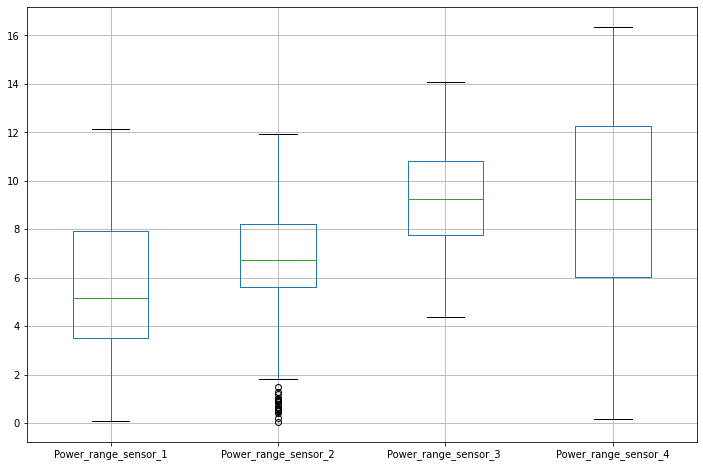

In [30]:
#box plot using pandas for each group and set of features
rishi = pd.DataFrame(df.where(df.Status == "Normal"),

                  columns=['Power_range_sensor_1', 'Power_range_sensor_2', 'Power_range_sensor_3 ', 'Power_range_sensor_4'])

boxplot = rishi.boxplot(column=['Power_range_sensor_1', 'Power_range_sensor_2', 'Power_range_sensor_3 ', 'Power_range_sensor_4'], figsize=(12,8))

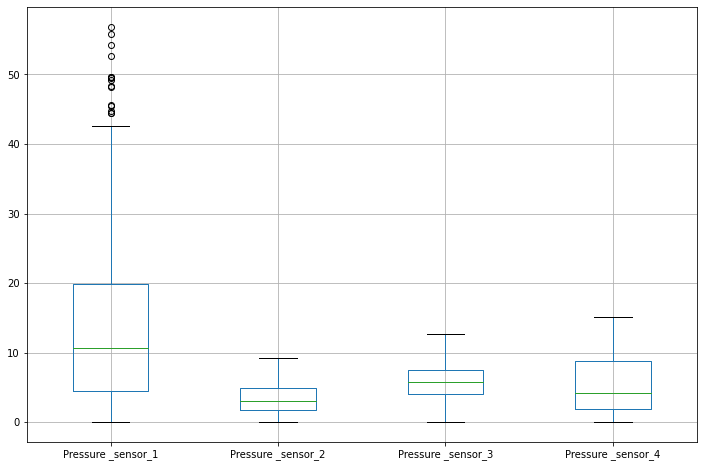

In [29]:
rishi = pd.DataFrame(df.where(df.Status == "Normal"),

                  columns=['Pressure _sensor_1', 'Pressure _sensor_2', 'Pressure _sensor_3', 'Pressure _sensor_4'])

boxplot = rishi.boxplot(column=['Pressure _sensor_1', 'Pressure _sensor_2', 'Pressure _sensor_3', 'Pressure _sensor_4'], figsize=(12,8))

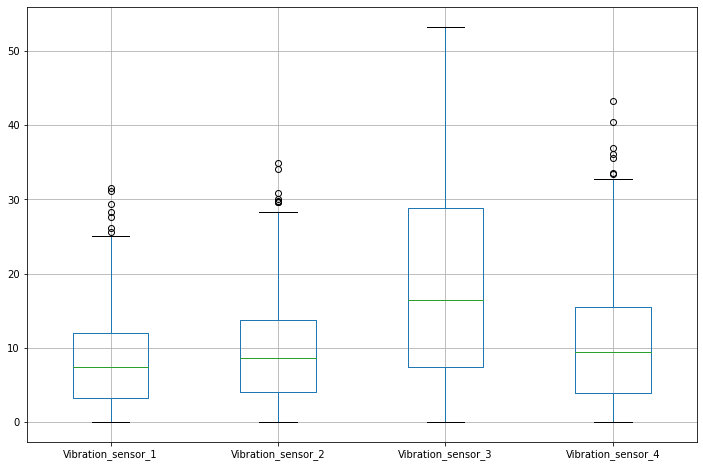

In [28]:
rishi = pd.DataFrame(df.where(df.Status == "Normal"),

                  columns=['Vibration_sensor_1', 'Vibration_sensor_2', 'Vibration_sensor_3', 'Vibration_sensor_4'])

boxplot = rishi.boxplot(column=['Vibration_sensor_1', 'Vibration_sensor_2', 'Vibration_sensor_3', 'Vibration_sensor_4'], figsize=(12,8))

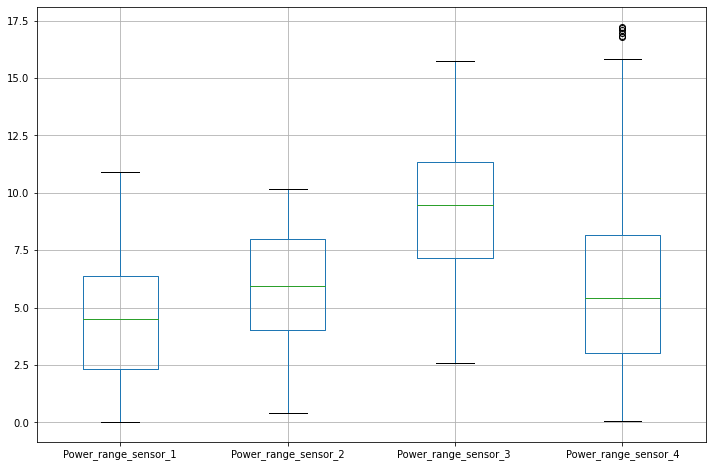

In [27]:
rishi = pd.DataFrame(df.where(df.Status == "Abnormal"),

                  columns=['Power_range_sensor_1', 'Power_range_sensor_2', 'Power_range_sensor_3 ', 'Power_range_sensor_4'])

boxplot = rishi.boxplot(column=['Power_range_sensor_1', 'Power_range_sensor_2', 'Power_range_sensor_3 ', 'Power_range_sensor_4'], figsize=(12,8))

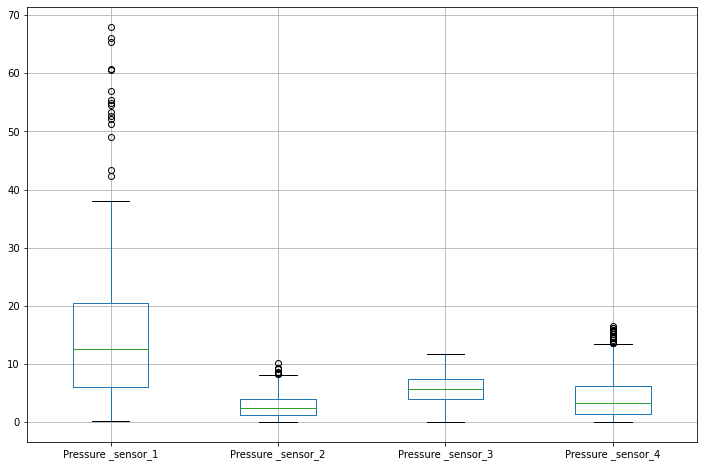

In [26]:
rishi = pd.DataFrame(df.where(df.Status == "Abnormal"),

                  columns=['Pressure _sensor_1', 'Pressure _sensor_2', 'Pressure _sensor_3', 'Pressure _sensor_4'])

boxplot = rishi.boxplot(column=['Pressure _sensor_1', 'Pressure _sensor_2', 'Pressure _sensor_3', 'Pressure _sensor_4'], figsize=(12,8))

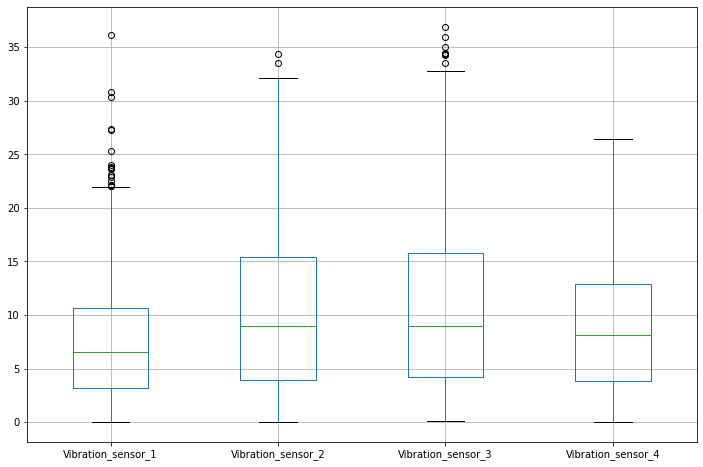

In [25]:
rishi = pd.DataFrame(df.where(df.Status == "Abnormal"),

                  columns=['Vibration_sensor_1', 'Vibration_sensor_2', 'Vibration_sensor_3', 'Vibration_sensor_4'])

boxplot = rishi.boxplot(column=['Vibration_sensor_1', 'Vibration_sensor_2', 'Vibration_sensor_3', 'Vibration_sensor_4'], figsize=(12,8))